<h3> Importando as bibliotecas Pandas e SciKit Learn </h3>

In [1]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np

<h3>Lendo os dados do modelo - automóveis</h3>

In [2]:
dataFrame = pd.read_excel('data/CO2Emissions.xlsx', sheet_name='Carros')
dataFrame

,Id,EngineSize,Cylinders,FuelConsumption,CO2Emissions
0,1,2.0,4,8.5,196
1,2,2.4,4,9.6,221
2,3,1.5,4,5.9,136
3,4,3.5,6,11.1,255
4,5,3.5,6,10.6,244
5,6,3.5,6,10.0,230
6,7,3.5,6,10.1,232
7,8,3.7,6,11.1,255
8,9,3.7,6,11.6,267


<h3>Excluindo as features que não serão utilizadas</h3>

In [3]:
dataFrame.drop(columns=['Id', 'Cylinders', 'FuelConsumption'], inplace=True)
dataFrame

,EngineSize,CO2Emissions
0,2.0,196
1,2.4,221
2,1.5,136
3,3.5,255
4,3.5,244
5,3.5,230
6,3.5,232
7,3.7,255
8,3.7,267


In [4]:
dataFrame.EngineSize

0    2.0
1    2.4
2    1.5
3    3.5
4    3.5
5    3.5
6    3.5
7    3.7
8    3.7
Name: EngineSize, dtype: float64

<h3>Plotando um scatterplot da variável dependente (CO2Emissions) e da variavel independente(EngineSize)</h3>

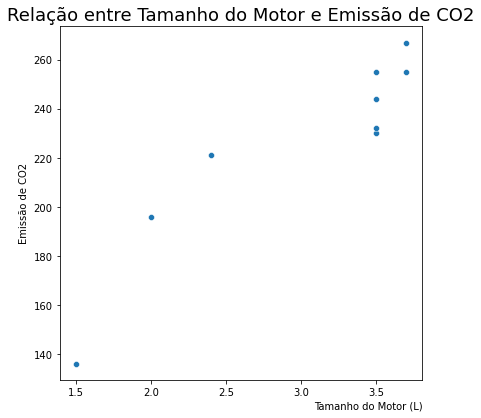

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(6.5, 6.5))

ax.set_title('Relação entre Tamanho do Motor e Emissão de CO2', fontsize=18)
ax.set_ylabel('Emissão de CO2', loc='center', fontsize=10)
ax.set_xlabel('Tamanho do Motor (L)', loc='right', fontsize=10)

sns.scatterplot(x='EngineSize', y='CO2Emissions',
                data=dataFrame, ax=ax)

plt.show()

<h3>Verificando a correlação da variável dependente (CO2Emissions) e da variavel independente(EngineSize)</h3>


In [6]:
dataFrame.corr()

,EngineSize,CO2Emissions
EngineSize,1.000000,0.919667
CO2Emissions,0.919667,1.000000


<h3>Calculando o coefieciente angular da reta de Regressão Linear</h3>

In [7]:
dados = pd.DataFrame()
dados['X'] = dataFrame['EngineSize']
dados['Y'] = dataFrame['CO2Emissions']
dados['XY'] = dados.X * dados.Y
dados['X2'] = dados.X * dados.X

coef = ((dados.shape[0] * dados.XY.sum()) - (dados.X.sum() * dados.Y.sum())) / ((dados.shape[0] * dados.X2.sum()) - (dados.X.sum() ** 2))
coef

43.98446833930711

<h3>Calculando o coefieciente linear da reta de Regressão Linear</h3>

In [8]:
intercepto = (dados.Y.sum() - coef * dados.X.sum()) / dados.shape[0]  
intercepto

92.80266825965734

<h3>Calculando o coeficiente angular da regressão linear</h3>


In [9]:
novo_carro_eng_size = 2.4
emissao_co2 = coef * novo_carro_eng_size + intercepto

<h3> Predizendo o valor de Emissão de CO2 para um novo carro com EngineSize igual a 2,4 </h3>

In [10]:
print(f'Tamanho do motor do novo modelo: {novo_carro_eng_size}')
print(f'Valor previsto de emissão de CO2: {emissao_co2.round(2)}')

Tamanho do motor do novo modelo: 2.4
Valor previsto de emissão de CO2: 198.37


<h3> Criando e utilizando um regressor linear com scikit-learn</h3>

In [11]:
lr = LinearRegression().fit(X=dataFrame[['EngineSize']], y=dataFrame.CO2Emissions)
print(f'Coeficiente Angular: {lr.coef_[0].round(3)}')
print(f'Coeficiente Linear: {lr.intercept_.round(3)}')

novo = pd.DataFrame(np.array([novo_carro_eng_size]), columns=['EngineSize'])

emissao_CO2_model = lr.predict(X=novo[['EngineSize']])[0];

print(f'Valor previsto de emissão de CO2: {emissao_CO2_model.round(2)}')

Coeficiente Angular: 43.984
Coeficiente Linear: 92.803
Valor previsto de emissão de CO2: 198.37


In [12]:
dataFrame

,EngineSize,CO2Emissions
0,2.0,196
1,2.4,221
2,1.5,136
3,3.5,255
4,3.5,244
5,3.5,230
6,3.5,232
7,3.7,255
8,3.7,267
